In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df = df.rename(index=str, columns={"Track Name": "Trackname"})
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Position,Trackname,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [2]:
df = df[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2017-12-31')]

In [3]:
df = df.dropna()
df.isnull().sum()
df['Position'] = None

In [4]:

df = df.groupby(['Artist','Trackname','Region'], as_index=False).sum()


In [5]:
import pycountry
df['Region'] = df['Region'].str.upper()

In [6]:
def convert_region(region):
    if region == 'GLOBAL':
        return region.title()
    return pycountry.countries.get(alpha2=region).name
    
df['Region'] = df['Region'].apply(convert_region) 

In [302]:
df = df.groupby(['Trackname', 'Artist', 'Region'], as_index=False)[['Streams']].sum().sort_values(by='Streams', ascending=False)

,Trackname,Artist,Region,Streams
47988,Shape of You,Ed Sheeran,Global,1490812208
12928,Despacito - Remix,Luis Fonsi,Global,919199404
12874,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,742841612
50509,Something Just Like This,The Chainsmokers,Global,692404365
20942,HUMBLE.,Kendrick Lamar,Global,662179904
58126,Unforgettable,French Montana,Global,650034771
25701,I'm the One,DJ Khaled,Global,636419786
63762,rockstar,Post Malone,Global,631519085
26867,It Ain't Me (with Selena Gomez),Kygo,Global,604115906
62190,XO TOUR Llif3,Lil Uzi Vert,Global,593112026


In [8]:
df.describe()

,Streams
count,6.499700e+04
mean,2.680502e+06
std,1.990083e+07
min,1.001000e+03
25%,1.400800e+04
50%,8.521900e+04
75%,6.368360e+05
max,1.470920e+09


In [9]:
df['Trackname'].unique().size

18286

In [10]:
df['Artist'].unique().size

6521

In [11]:
df['Region'].unique().size

54

In [12]:
df['Region'].unique()

array(['Global', 'United States', 'United Kingdom', 'Mexico', 'Germany',
       'Brazil', 'Spain', 'Sweden', 'Philippines', 'Netherlands',
       'Argentina', 'Australia', 'Canada', 'France', 'Chile', 'Italy',
       'Norway', 'Denmark', 'Indonesia', 'Peru', 'Turkey', 'Poland',
       'Singapore', 'Colombia', 'Finland', 'New Zealand', 'Malaysia',
       'Ireland', 'Belgium', 'Switzerland', 'Portugal',
       'Taiwan, Province of China', 'Costa Rica', 'Japan', 'Ecuador',
       'Austria', 'Hong Kong', 'Czech Republic', 'Paraguay', 'Uruguay',
       'Guatemala', 'Hungary', 'Bolivia, Plurinational State of',
       'Dominican Republic', 'Panama', 'Honduras', 'El Salvador',
       'Greece', 'Iceland', 'Slovakia', 'Lithuania', 'Latvia', 'Estonia',
       'Luxembourg'], dtype=object)

In [13]:
def top_100(group):
    return group.sort_values('Streams', ascending=False).nlargest(100, columns=['Streams'])

df_top_100 = df.groupby(['Region'], as_index=False).apply(top_100).reset_index()


In [14]:
unique_artist_by_country = df.groupby(['Region'])['Artist'].unique()

In [15]:
artists_appear_in_country = [artist for row in unique_artist_by_country for artist in row]
n_countries = df['Region'].nunique()

In [16]:
from collections import Counter
artist_country_appears = pd.DataFrame.from_dict(Counter(artists_appear_in_country), orient='index', )

In [17]:
artist_country_appears.columns = ['Countries']

In [18]:
artist_country_appears.reset_index(level=0, inplace=True)

In [19]:
artist_country_appears = artist_country_appears.rename(index=str, columns= {"index":"Artist"})

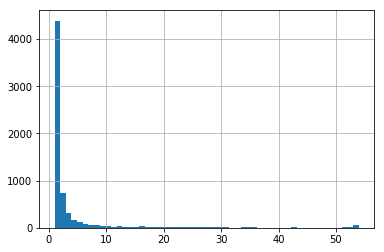

In [20]:
import matplotlib
%matplotlib inline

# Histogram of the Number of Countries Each Artist Appears in
artist_country_appears['Countries'].hist(bins=n_countries)

In [21]:
artist_country_appears.sort_values('Countries', ascending=False)

,Artist,Countries
0,Luis Fonsi,54
86,Calvin Harris,54
168,Sam Smith,54
82,Ariana Grande,54
34,Clean Bandit,54
178,Axwell /\ Ingrosso,54
79,Imagine Dragons,54
78,Shawn Mendes,54
39,The Weeknd,54
76,Martin Garrix,54


In [22]:
artist_country_appears['Percent'] = 100.0 * artist_country_appears['Countries'] / n_countries
artist_country_appears[artist_country_appears['Countries'] == n_countries].sort_values(by=['Artist'])

,Artist,Countries,Percent
82,Ariana Grande,54,100.0
174,Avicii,54,100.0
178,Axwell /\ Ingrosso,54,100.0
46,Bruno Mars,54,100.0
86,Calvin Harris,54,100.0
65,Camila Cabello,54,100.0
51,Charlie Puth,54,100.0
155,Cheat Codes,54,100.0
34,Clean Bandit,54,100.0
104,DJ Khaled,54,100.0


In [23]:
artist_country_appears[artist_country_appears['Countries'] == 1].sort_values(by=['Artist'])

,Artist,Countries,Percent
2632,$uicideBoy$,1,1.851852
2859,-M-,1,1.851852
4765,070 Shake,1,1.851852
6128,100%,1,1.851852
4561,101Barz,1,1.851852
3299,12:00,1,1.851852
2806,13 Block,1,1.851852
1609,16yrold,1,1.851852
5612,1987,1,1.851852
1412,1Kilo,1,1.851852


In [24]:
artist_gt_1 = artist_country_appears[artist_country_appears['Countries'] > 1]['Artist']

In [25]:
artist_gt_1

0                     Luis Fonsi
1                    Danny Ocean
2                         Maluma
3                     Ed Sheeran
4                          Wisin
5                    Chris Jeday
6                      Nicky Jam
7                           CNCO
8                   Daddy Yankee
9                  Zion & Lennox
10                       Piso 21
11                      J Balvin
12                        Rombai
13                 Natti Natasha
14                       Shakira
15                      Anuel Aa
16                       Becky G
17                         Ozuna
18               Sebastian Yatra
19              Enrique Iglesias
20                    MC Kevinho
21                         Nacho
22                  Ricky Martin
23                      Don Omar
24                      IAmChino
25                 Manuel Turizo
26                        Dame 5
27                  Charly Black
28                Alex Sensation
29                     Olvidate!
          

In [26]:
def compare_top_x_artist(artist_list):
    return len(set(artist_gt_1).intersection(artist_list))
    
total_intl_artists_by_country = unique_artist_by_country.apply(compare_top_x_artist)
total_artists_by_country = df.groupby('Region')['Artist'].nunique()

In [27]:
diversity = pd.DataFrame({'total_intl': total_intl_artists_by_country, 'total_artists':total_artists_by_country})
diversity['percent'] = 100 * diversity['total_intl'] / diversity['total_artists']
diversity.sort_values('percent')

,total_artists,total_intl,percent
Region,,,
Japan,611,304,49.754501
Turkey,462,241,52.164502
"Taiwan, Province of China",1054,574,54.459203
Finland,709,389,54.866008
Brazil,296,190,64.189189
Sweden,867,569,65.628604
Italy,518,352,67.953668
Iceland,345,238,68.985507
Denmark,620,432,69.677419


In [28]:
df['TotalStreams'] = df['Streams'].groupby(df['Region']).transform('sum')

In [29]:
df['Percent'] = 100 * df['Streams'] / df['TotalStreams']

In [30]:
def sort(group):
    return group.sort_values('Percent', ascending=False).nlargest(5, columns=['Percent'])

df_top_plays = df.groupby('Region', as_index=False).apply(sort).reset_index()

In [31]:
df['Percent'].groupby(df['Region']).max()

Region
Argentina                          1.964855
Australia                          1.558522
Austria                            1.684378
Belgium                            2.040020
Bolivia, Plurinational State of    2.751482
Brazil                             1.437533
Canada                             1.514541
Chile                              1.999913
Colombia                           1.890532
Costa Rica                         2.050892
Czech Republic                     2.091103
Denmark                            1.635850
Dominican Republic                 1.543674
Ecuador                            2.019008
El Salvador                        2.543098
Estonia                            4.068633
Finland                            1.253514
France                             1.485302
Germany                            1.627234
Global                             1.960676
Greece                             3.019878
Guatemala                          2.043991
Honduras                 

In [32]:
# look at top 10 songs to see percentage of time they get
def top_10(group):
    return group.sort_values('Streams', ascending=False).nlargest(10, columns=['Streams'])

df_top_10 = df.groupby('Region').apply(top_10)
df_top_10

Trackname              Artist  \
Region                                                                         
Argentina      12648  Despacito (Featuring Daddy Yankee)          Luis Fonsi   
               33540                           Me Rehúso         Danny Ocean   
               17140                       Felices los 4              Maluma   
               47187                        Shape of You          Ed Sheeran   
               15833                    Escápate Conmigo               Wisin   
               1618                           Ahora Dice         Chris Jeday   
               14982                           El Amante           Nicky Jam   
               43361          Reggaetón Lento (Bailemos)                CNCO   
               28997                  La Rompe Corazones        Daddy Yankee   
               39814           Otra Vez (feat. J Balvin)       Zion & Lennox   
Australia      47188                        Shape of You          Ed Sheeran   
               20477                             HUMBLE.      Kendrick Lamar   
               12703                   Despacito - Remix          Luis Fonsi   
               57167                       Unforgettable      French Montana   
               62759                            rockstar         Post Malone   
               9095                   Castle on the Hill          Ed Sheeran   
               10938                     Congratulations         Post Malone   
               49675            Something Just Like This    The Chainsmokers   
               25178                         I'm the One           DJ Khaled   
               55173                             Thunder     Imagine Dragons   
Austria        47189                        Shape of You          Ed Sheeran   
               35122                  More Than You Know  Axwell /\ Ingrosso   
               55174                             Thunder     Imagine Dragons   
               49676            Something Just Like This    The Chainsmokers   
               49414                          Solo Dance       Martin Jensen   
               5460                             Believer     Imagine Dragons   
               26297     It Ain't Me (with Selena Gomez)                Kygo   
               38465                                  OK        Robin Schulz   
               12650  Despacito (Featuring Daddy Yankee)          Luis Fonsi   
               12704                   Despacito - Remix          Luis Fonsi   
...                                                  ...                 ...   
United Kingdom 47238                        Shape of You          Ed Sheeran   
               9145                   Castle on the Hill          Ed Sheeran   
               12753                   Despacito - Remix          Luis Fonsi   
               57217                       Unforgettable      French Montana   
               18629                         Galway Girl          Ed Sheeran   
               52323       Symphony (feat. Zara Larsson)        Clean Bandit   
               25228                         I'm the One           DJ Khaled   
               36709                           New Rules            Dua Lipa   
               61807      You Don't Know Me - Radio Edit           Jax Jones   
               60393                       Wild Thoughts           DJ Khaled   
United States  20528                             HUMBLE.      Kendrick Lamar   
               61247                       XO TOUR Llif3        Lil Uzi Vert   
               10986                     Congratulations         Post Malone   
               47239                        Shape of You          Ed Sheeran   
               33250                            Mask Off              Future   
               12754                   Despacito - Remix          Luis Fonsi   
               62810                            rockstar         Post Malone   
               62689             iSpy (feat. Li

In [33]:
# del df_top_10['Percent']
df_top_10_percent = pd.DataFrame({'top_10_total':df_top_10['Streams'].groupby(df_top_10['Region']).sum(),
             'total':df_top_10['TotalStreams'].groupby(df_top_10['Region']).max()})
df_top_10_percent['Percent'] = df_top_10_percent['top_10_total'] / df_top_10_percent['total']

In [34]:
100*df_top_10_percent

,top_10_total,total,Percent
Region,,,
Argentina,38059639600,268757093900,14.161353
Australia,30003910400,328349939400,9.137785
Austria,3232767900,33587964400,9.624781
Belgium,5154029600,54414079200,9.471868
"Bolivia, Plurinational State of",1664188300,9431970000,17.644122
Brazil,68290280600,667786779300,10.226360
Canada,31599466900,312589339100,10.108939
Chile,29758970800,212346799200,14.014325
Colombia,11669836000,81380595000,14.339826


In [35]:
# df.pivot(index='Region', columns='Trackname', values = 'Percent')
df['Artist_Trackname'] = df['Artist'] + ' ' + df['Trackname']

In [36]:
ml = df[['Artist_Trackname', 'Region', 'Percent']]

In [37]:
ml = ml.pivot(index='Region', columns='Artist_Trackname', values='Percent')
ml.fillna(0)

Artist_Trackname,#TocoParaVos Bailemos juntos,#TocoParaVos Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos Hasta la luna,#TocoParaVos Me provoca (Noche loca),#TocoParaVos Su fiel admirador,#TocoParaVos Sólo necesito,#TocoParaVos Tan infinito,#TocoParaVos Tengo un vicio,#TocoParaVos Tu beso y tu piel (feat. Gustas Mio),#TocoParaVos Uh amor (feat. Lionel Ferro),...,黃義達 到底多久,黃義達 匿名的寶貝,黃義達 每天的每夜,黃聖萊Lex 看好,黃荻鈞 半年,黄靖伦 我會一直記得,黄靖伦 舊傷,鼓鼓 為愛而愛,齊晨 到此為止,龔詩嘉 My Island Home
Region,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.001478,0.079744,0.000000,0.000000,0.000536,0.000000,0.000000,0.000500,0.000508,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Australia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
"Bolivia, Plurinational State of",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Brazil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Chile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Colombia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


In [47]:
ml.shape


9.058616189683212

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(ml.drop('Region', axis=1))

ValueError: labels ['Region'] not contained in axis

In [54]:
ml['Region'][0]

KeyError: 'Region'

In [68]:
ml = ml.reset_index()

ValueError: cannot insert level_0, already exists

In [81]:
ml = ml.drop('index', axis=1)

In [84]:
countries = ml.Region
countries

0                           Argentina
1                           Australia
2                             Austria
3                             Belgium
4     Bolivia, Plurinational State of
5                              Brazil
6                              Canada
7                               Chile
8                            Colombia
9                          Costa Rica
10                     Czech Republic
11                            Denmark
12                 Dominican Republic
13                            Ecuador
14                        El Salvador
15                            Estonia
16                            Finland
17                             France
18                            Germany
19                             Global
20                             Greece
21                          Guatemala
22                           Honduras
23                          Hong Kong
24                            Hungary
25                            Iceland
26          

In [89]:
ml = ml.drop('Region', axis=1)
ml = ml.fillna(0)

In [94]:
two_d_features = pca.fit_transform(ml)

In [108]:
results = pd.DataFrame(two_d_features, columns=['f1', 'f2'])
results['country'] = countries

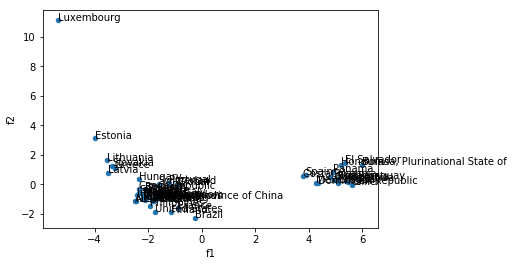

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200, 200))

ax = results.plot('f1', 'f2', kind='scatter')
results[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);

In [134]:
groupA = results[results['f1'] > 3] # Latin America
groupB = results[(results['f2'] < 0.5) & (results['f1'] < 2)]
groupC = results[(results['f2'] > 0.5) & (results['f1'] < 2)]

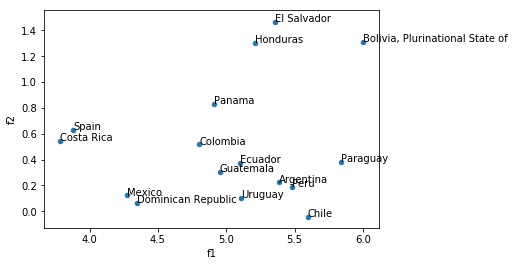

In [135]:
ax = groupA.plot('f1', 'f2', kind='scatter')
groupA[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);

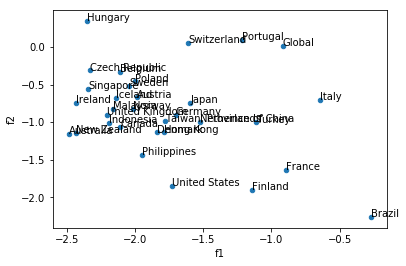

In [138]:
ax = groupB.plot('f1', 'f2', kind='scatter')
groupB[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);

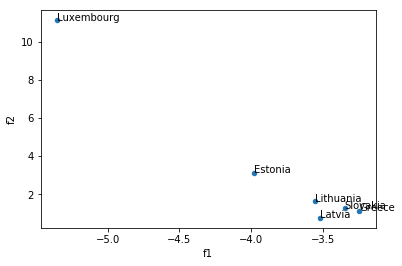

In [140]:
ax = groupC.plot('f1', 'f2', kind='scatter')
groupC[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);

In [156]:
df.groupby(['Trackname', 'Artist']).sum().sort_values('Streams', ascending=False)

,,Streams,TotalStreams,Percent
Trackname,Artist,,,
Shape of You,Ed Sheeran,2954314942,174224564822,107.852901
Despacito - Remix,Luis Fonsi,1808988398,174224564822,53.836855
Despacito (Featuring Daddy Yankee),Luis Fonsi,1449083311,174224564822,57.067144
Something Just Like This,The Chainsmokers,1366414897,174224564822,49.406559
HUMBLE.,Kendrick Lamar,1288359986,174224564822,30.478508
Unforgettable,French Montana,1265161586,174224564822,35.391527
I'm the One,DJ Khaled,1241605052,174224564822,33.709729
rockstar,Post Malone,1186411578,174224564822,29.418211
It Ain't Me (with Selena Gomez),Kygo,1179203261,174224564822,41.601776


In [158]:
shapeofyou = df[(df['Trackname'] == 'Shape of You') & (df['Artist'] == 'Ed Sheeran')]

,Trackname,Artist,Region,Streams,TotalStreams,Percent,Artist_Trackname
47206,Shape of You,Ed Sheeran,Global,1470919913,75021041432,1.960676,Ed Sheeran Shape of You
47239,Shape of You,Ed Sheeran,United States,278916058,25764218998,1.082571,Ed Sheeran Shape of You
47238,Shape of You,Ed Sheeran,United Kingdom,130658891,7031797779,1.858115,Ed Sheeran Shape of You
47205,Shape of You,Ed Sheeran,Germany,96505235,5930629218,1.627234,Ed Sheeran Shape of You
47192,Shape of You,Ed Sheeran,Brazil,95996545,6677867793,1.437533,Ed Sheeran Shape of You
47221,Shape of You,Ed Sheeran,Mexico,86326454,6178260482,1.397261,Ed Sheeran Shape of You
47234,Shape of You,Ed Sheeran,Sweden,63184448,3306216382,1.911080,Ed Sheeran Shape of You
47233,Shape of You,Ed Sheeran,Spain,60057135,3667338121,1.637622,Ed Sheeran Shape of You
47228,Shape of You,Ed Sheeran,Philippines,57245668,3241421071,1.766067,Ed Sheeran Shape of You
47222,Shape of You,Ed Sheeran,Netherlands,55512591,3393297216,1.635948,Ed Sheeran Shape of You


In [160]:
df = pd.read_csv('data.csv')
df = df.rename(index=str, columns={"Track Name": "Trackname"})
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df = df.dropna()
df.isnull().sum()
df['Position'] = None

In [161]:
df.head()

,Position,Trackname,Artist,Streams,URL,Date,Region
0,None,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,None,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,None,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,None,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,None,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [162]:
shapeofyou = df[(df['Trackname'] == 'Shape of You') & (df['Artist'] == 'Ed Sheeran')]

In [163]:
shapeofyou.head()

,Position,Trackname,Artist,Streams,URL,Date,Region
1020,None,Shape of You,Ed Sheeran,7099,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,ec
1210,None,Shape of You,Ed Sheeran,9695,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,ec
1407,None,Shape of You,Ed Sheeran,10382,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-08,ec
1603,None,Shape of You,Ed Sheeran,12200,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-09,ec
1803,None,Shape of You,Ed Sheeran,12360,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-10,ec


In [170]:
import pycountry
shapeofyou['Region'] = shapeofyou['Region'].str.upper()
def convert_region(region):
    if region == 'GLOBAL':
        return region.title()
    return pycountry.countries.get(alpha2=region).name
    
shapeofyou['Region'] = shapeofyou['Region'].apply(convert_region) 

/Users/Andrew/miniconda3/envs/spotify/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Andrew/miniconda3/envs/spotify/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/Andrew/miniconda3/envs/spotify/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Region
Argentina                          AxesSubplot(0.125,0.2;0.775x0.68)
Australia                          AxesSubplot(0.125,0.2;0.775x0.68)
Austria                            AxesSubplot(0.125,0.2;0.775x0.68)
Belgium                            AxesSubplot(0.125,0.2;0.775x0.68)
Bolivia, Plurinational State of    AxesSubplot(0.125,0.2;0.775x0.68)
Brazil                             AxesSubplot(0.125,0.2;0.775x0.68)
Canada                             AxesSubplot(0.125,0.2;0.775x0.68)
Chile                              AxesSubplot(0.125,0.2;0.775x0.68)
Colombia                           AxesSubplot(0.125,0.2;0.775x0.68)
Costa Rica                         AxesSubplot(0.125,0.2;0.775x0.68)
Czech Republic                     AxesSubplot(0.125,0.2;0.775x0.68)
Denmark                            AxesSubplot(0.125,0.2;0.775x0.68)
Dominican Republic                 AxesSubplot(0.125,0.2;0.775x0.68)
Ecuador                            AxesSubplot(0.125,0.2;0.775x0.68)
El Salvador                

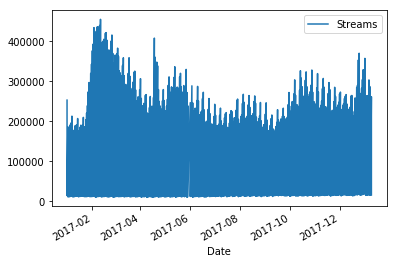

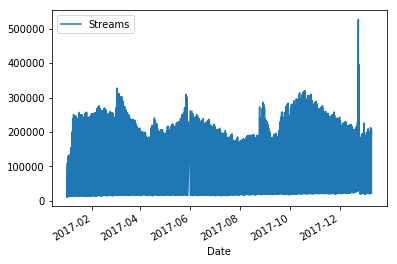

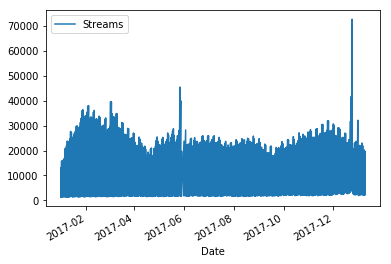

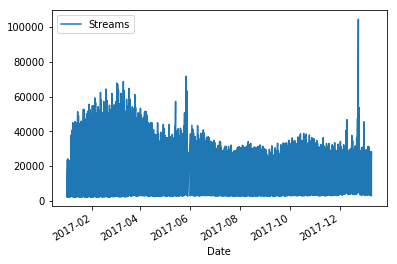

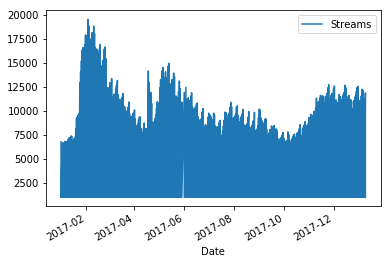

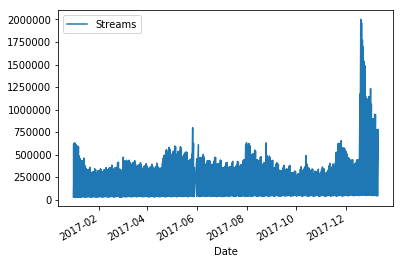

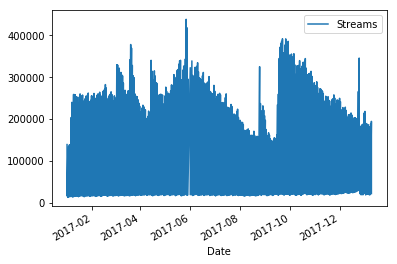

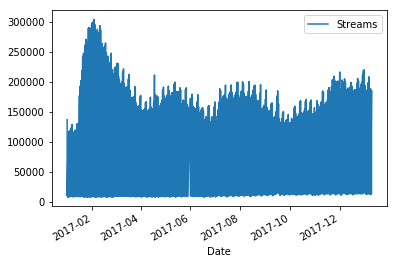

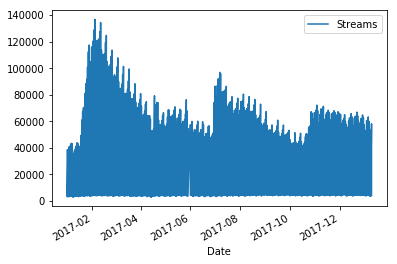

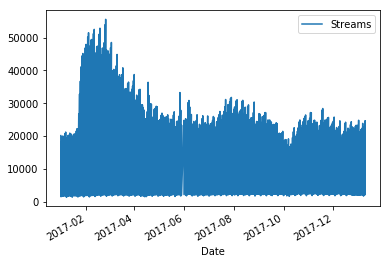

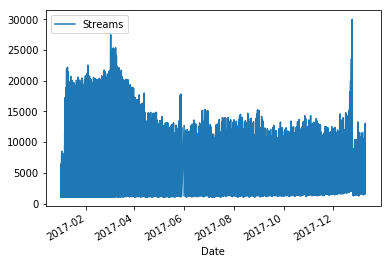

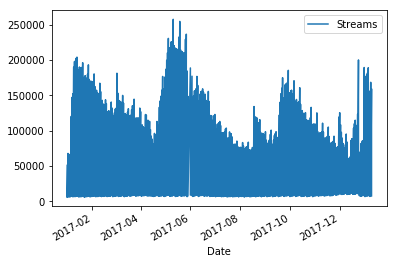

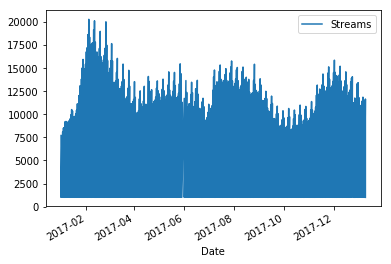

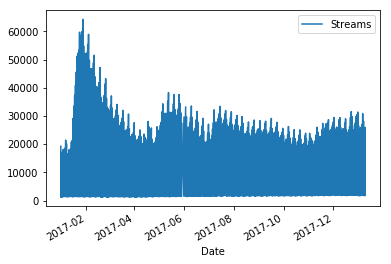

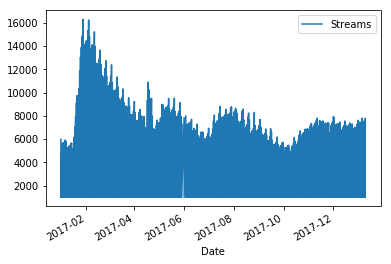

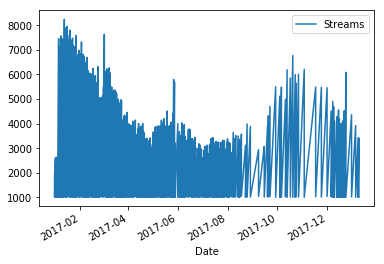

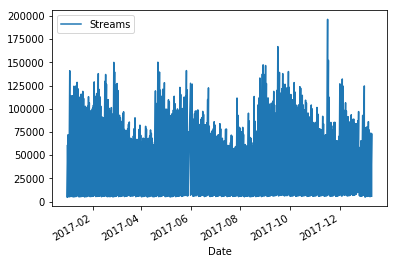

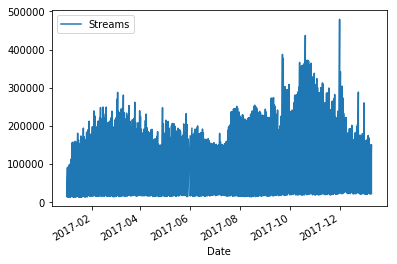

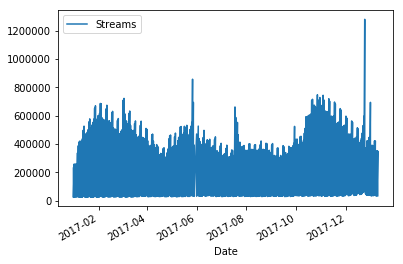

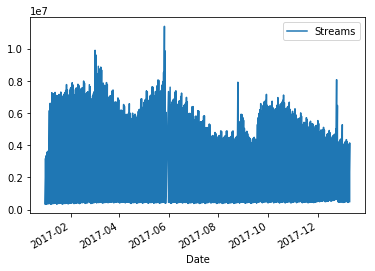

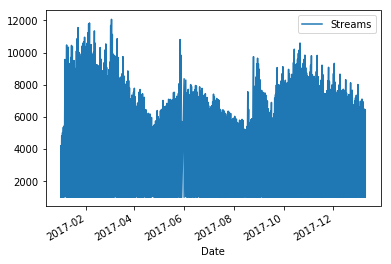

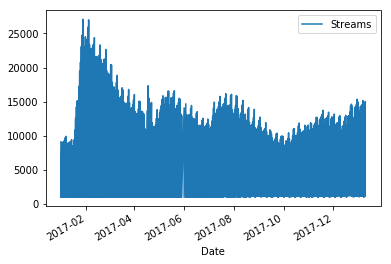

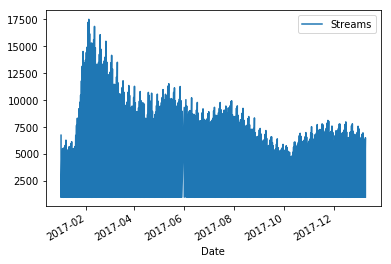

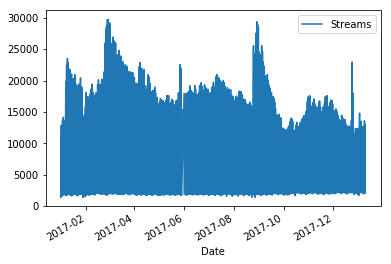

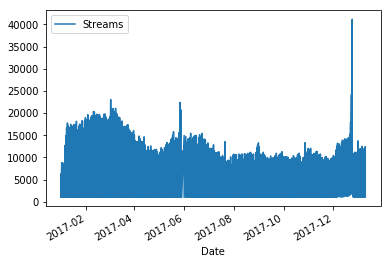

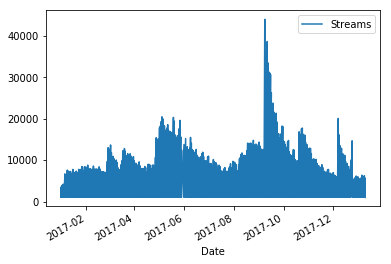

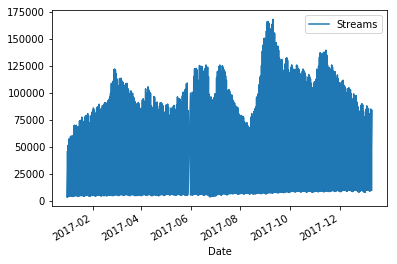

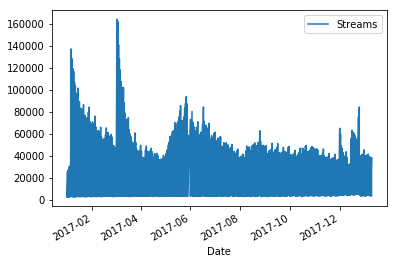

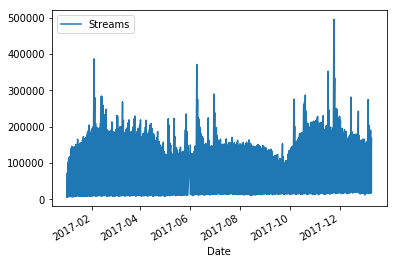

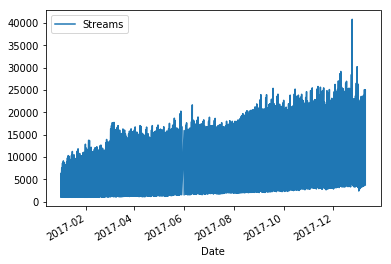

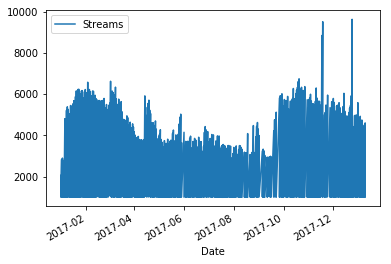

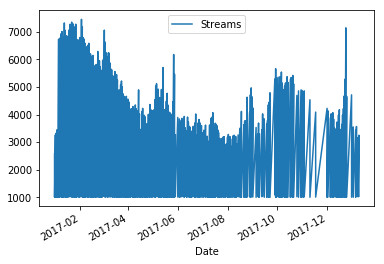

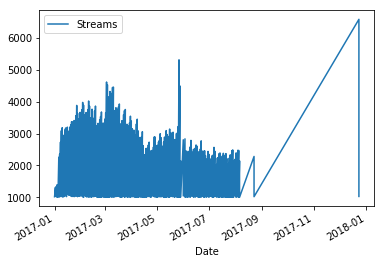

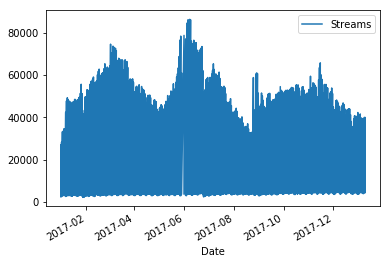

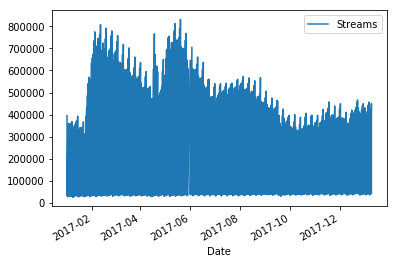

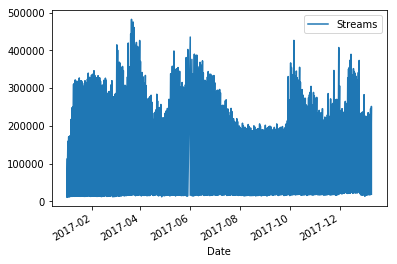

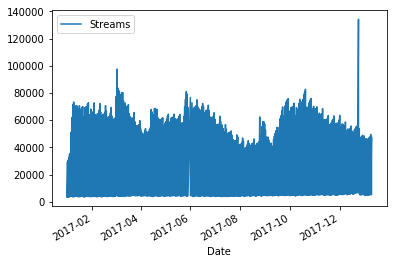

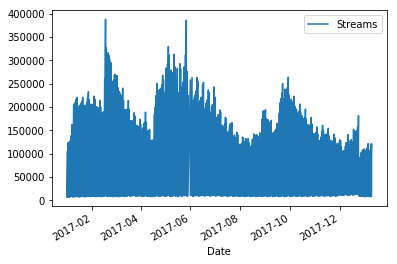

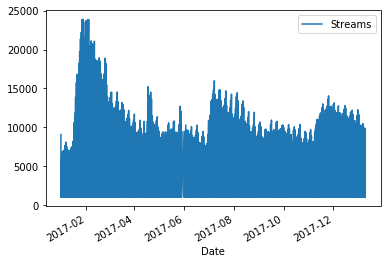

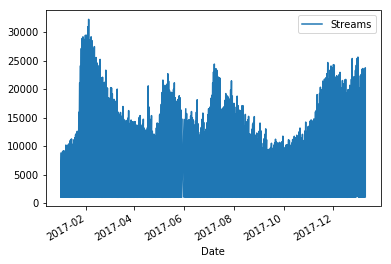

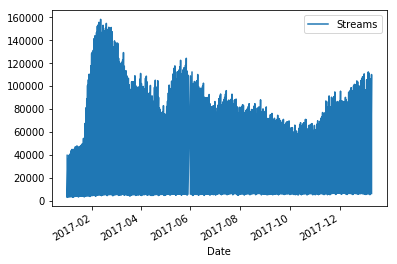

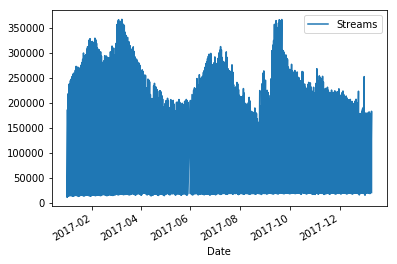

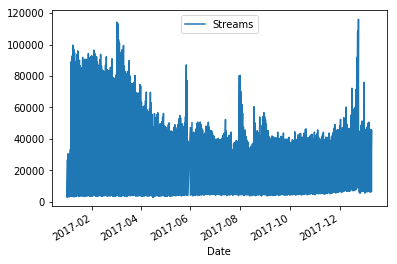

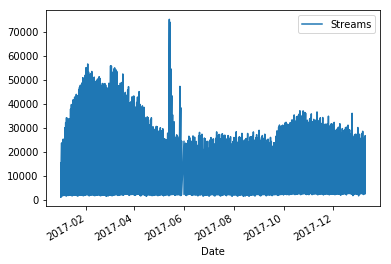

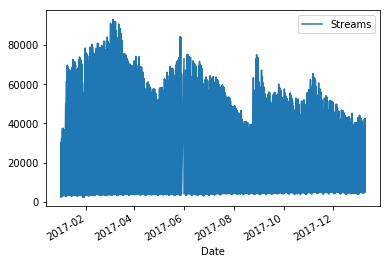

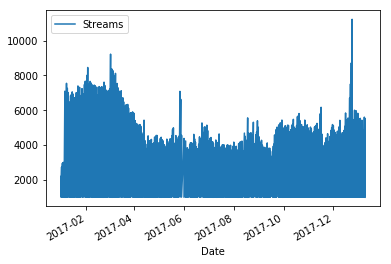

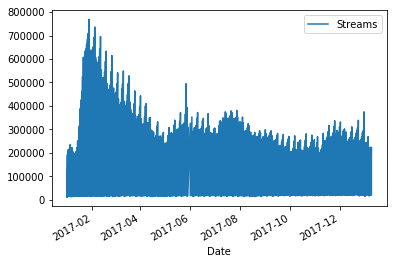

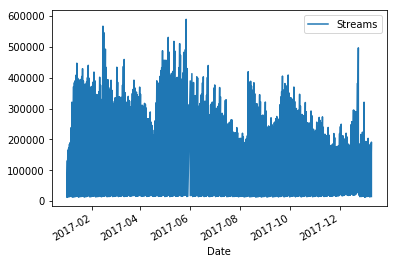

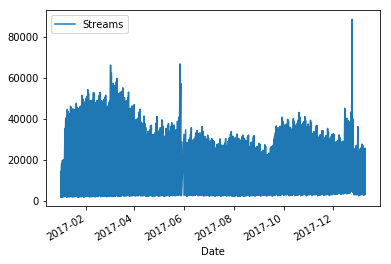

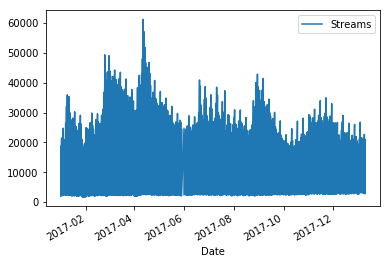

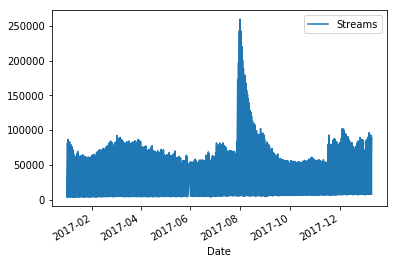

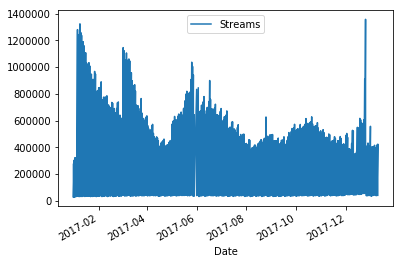

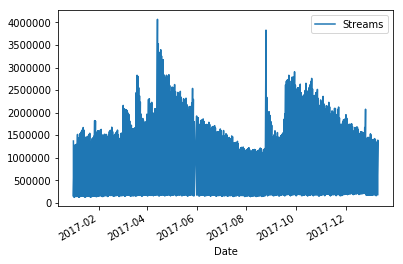

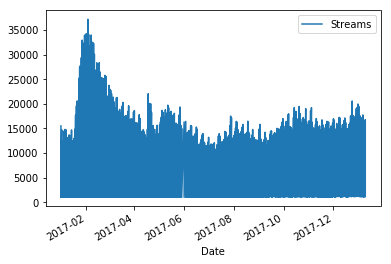

In [171]:
df.groupby('Region').plot(kind='line', x='Date', y='Streams')

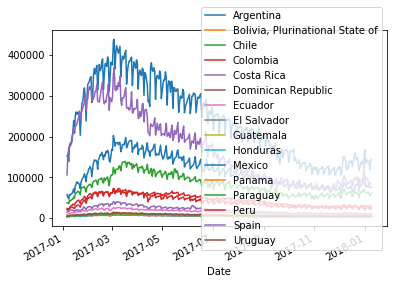

In [208]:
fig, ax = plt.subplots()

for key, grp in shapeofyou[shapeofyou['Region'].isin(groupA['country'])].groupby(['Region']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Streams', label=key)

plt.legend(loc='right')
plt.show()


In [175]:
shapeofyou.head()

,Position,Trackname,Artist,Streams,URL,Date,Region
1020,None,Shape of You,Ed Sheeran,7099,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,Ecuador
1210,None,Shape of You,Ed Sheeran,9695,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,Ecuador
1407,None,Shape of You,Ed Sheeran,10382,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-08,Ecuador
1603,None,Shape of You,Ed Sheeran,12200,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-09,Ecuador
1803,None,Shape of You,Ed Sheeran,12360,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-10,Ecuador


In [198]:
shapeofyou['TotalStreams'] = shapeofyou['Streams'].groupby(shapeofyou['Region']).transform('sum')

/Users/Andrew/miniconda3/envs/spotify/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [199]:
shapeofyou['Percent'] = shapeofyou['Streams'] / shapeofyou['TotalStreams']

/Users/Andrew/miniconda3/envs/spotify/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


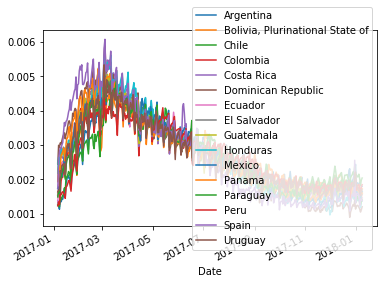

In [210]:
fig, ax = plt.subplots()

for key, grp in shapeofyou[shapeofyou['Region'].isin(groupA['country'])].groupby(['Region']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Percent', label=key)

plt.legend(loc='right')
plt.show()


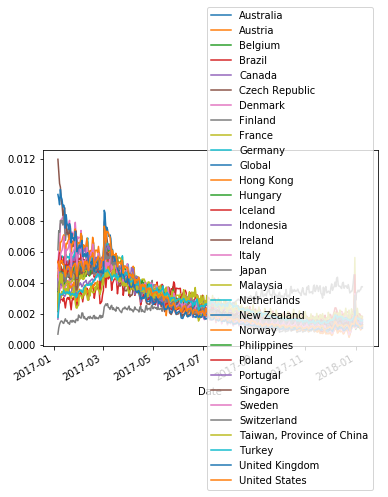

In [211]:
fig, ax = plt.subplots()

for key, grp in shapeofyou[shapeofyou['Region'].isin(groupB['country'])].groupby(['Region']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Percent', label=key)

plt.legend(loc='right')
plt.show()


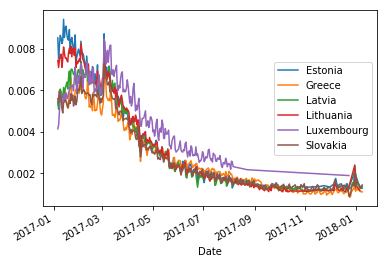

In [213]:
fig, ax = plt.subplots()

for key, grp in shapeofyou[shapeofyou['Region'].isin(groupC['country'])].groupby(['Region']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Percent', label=key)

plt.legend(loc='right')
plt.show()

In [247]:
peak_dates = shapeofyou[shapeofyou.groupby(['Region'])['Streams'].transform('max') == shapeofyou['Streams']].sort_values('Date')

In [248]:
peak_dates['Rank'] = range(len(peak_dates))
peak_dates.head()

,Position,Trackname,Artist,Streams,URL,Date,Region,TotalStreams,Percent,Rank
2585000,None,Shape of You,Ed Sheeran,137359.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,Ireland,11480510.0,0.011965,0
3044043,None,Shape of You,Ed Sheeran,1323982.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-09,United Kingdom,132102967.0,0.010022,1
684984,None,Shape of You,Ed Sheeran,8244.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-13,Estonia,874398.0,0.009428,2
225000,None,Shape of You,Ed Sheeran,128444.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-13,Finland,15490841.0,0.008292,3
1797922,None,Shape of You,Ed Sheeran,204166.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-13,Denmark,24456121.0,0.008348,4


In [291]:
peak_dates = peak_dates.replace({'Bolivia, Plurinational State of':'Bolivia', 'United States':'United States of America',
                                'Taiwan, Province of China':'Taiwan'})

In [301]:
import folium
import pandas as pd

country_geo = os.path.join('world-countries.json')

# state_unemployment = os.path.join('data', 'US_Unemployment_Oct2012.csv')
# state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[0, 0], zoom_start=1)

m.choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=peak_dates,
    columns=['Region', 'Rank'],
    key_on='properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='First to Get the Song'
)


folium.LayerControl().add_to(m)

m


Populating the interactive namespace from numpy and matplotlib


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

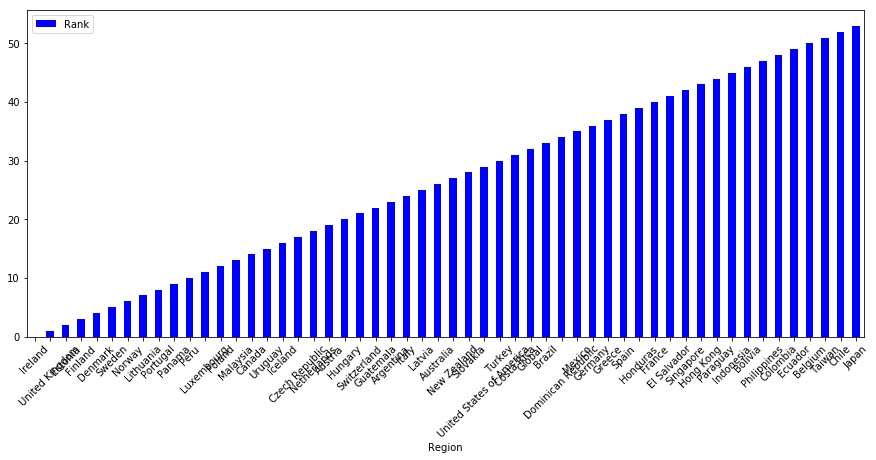

In [293]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

ax = peak_dates.plot(x='Region', y='Rank', kind='bar', color='blue')
plt.xticks(rotation=45)